In [1]:
import torch as tr
import numpy as np

import itertools

from PM_models import *
from PM_tasks import *
from help_amtask import *

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

# training acc

In [2]:
nmaps = 4
fdir = 'model_data/amtask-barcode/'
nnets = 20

In [3]:
def load_trsc(st,inst,stim,seed):
  fpath = "nmaps_4-ntrials_2-wmsize_%i-instdim_%i-stimdim_%i-seed_%i-trsc.npy"%(st,inst,stim,seed)
  trsc = np.load(fdir+fpath)
  return trsc

def load_trsc_group(st,inst,stim,nnets=nnets):
  L = []
  for seed in range(nnets):
    trsc = load_trsc(st,inst,stim,seed)
    L.append(trsc)
  return np.array(L)

In [4]:
instdimL=[8,10,12]
stimdimL=[8,10,12]
stsizeL=[4,5,6,8]

In [15]:
def plt_trsc(ax,trsc,nnets=nnets):
  cL = ['b','purple']
  for sub in range(nnets):
    for trial in [0,1]:
      trsc_tr = trsc[sub,:,trial,nmaps:].mean(-1)
      tracc = mov_avg(trsc_tr,1000)
      ax.plot(tracc,c=cL[trial],lw=.5,zorder=100*trial)
      ax.axhline(0.25,c='r',lw=.1,ls='--')
  return None

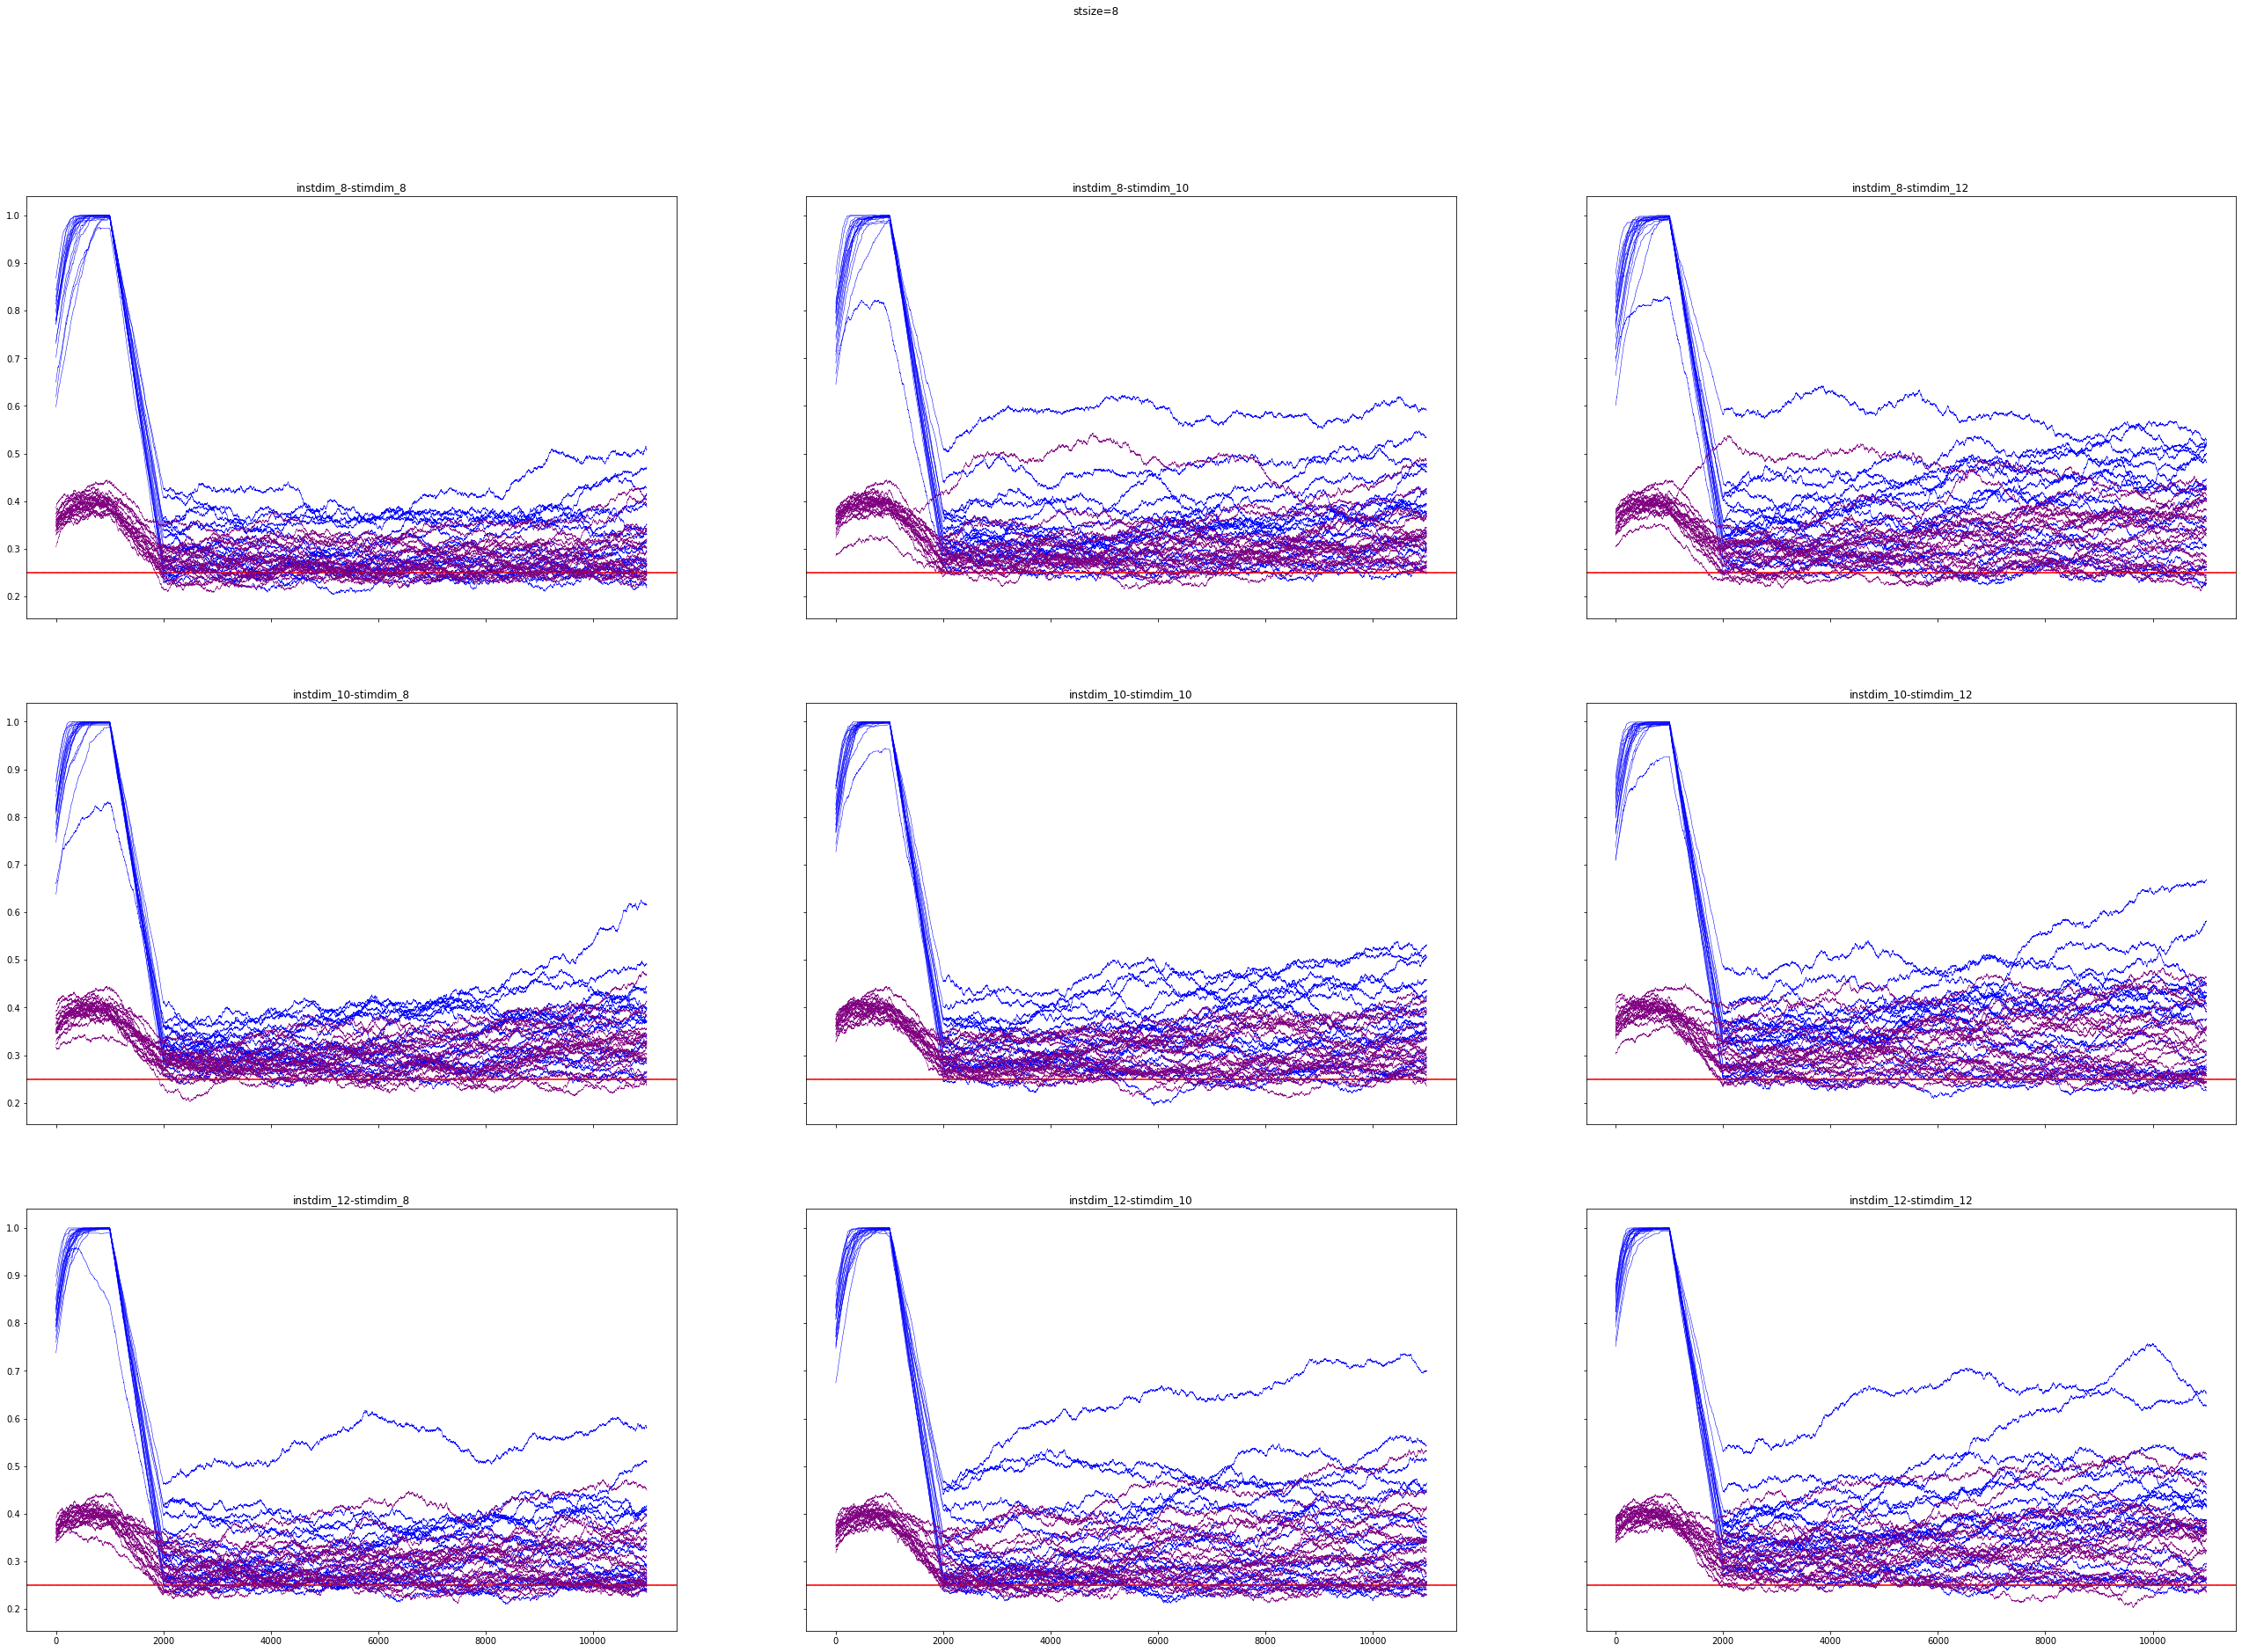

In [16]:
f=3
for st in stsizeL:
  plt.close('all')
  fig,axarr = plt.subplots(3,3,figsize=(f*15,f*10),sharex=True,sharey=True);axarr=axarr.reshape(-1)
  plt.suptitle('stsize=%i'%st)
  for idx,(inst,stim) in enumerate(itertools.product(stimdimL,instdimL)):
    ax = axarr[idx]
    title = 'instdim_%i-stimdim_%i'%(inst,stim)
    ax.set_title(title)
    trsc = load_trsc_group(st,inst,stim)
    plt_trsc(ax,trsc)
  plt.savefig('figures/amtask-barcodes/tracc/'+'stsize-%i'%st)

# eval acc

In [32]:
def load_evsc(st,inst,stim,seed):
  L = []
  for em in [0,1]:
    fpath = "nmaps_4-ntrials_2-wmsize_%i-instdim_%i-stimdim_%i-seed_%i-ev_em_%i-evsc.npy"%(st,inst,stim,seed,em)
    trsc = np.load(fdir+fpath)
    L.append(trsc)
  return np.array(L)

def load_evsc_group(st,inst,stim,nnets=nnets):
  L = []
  for seed in range(nnets):
    trsc = load_evsc(st,inst,stim,seed)
    L.append(trsc)
  return np.array(L)

In [33]:
evsc = load_evsc(4,10,10,0)
evsc.shape

(2, 500, 15, 9)

In [35]:
evsc = load_evsc_group(st,inst,stim,nnets=4)


(4, 2, 500, 15, 9)

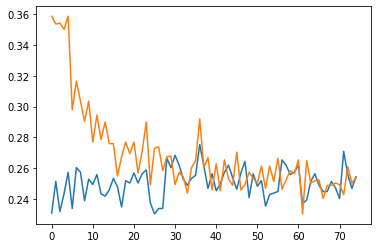

In [46]:
evacc = evsc[:,:,:,:,nmaps:].mean((2))

M = evacc.mean(0).reshape(2,-1)
# plt.plot(M)
plt.plot(M.T)

# train and eval

In [2]:
wmsize=5
emsetting=1
seed=3
instdim=10
stimdim=10

net = NetBarCode(wmsize=wmsize,
                 emsetting=emsetting,
                 seed=seed,
                 instdim=instdim,
                 stimdim=stimdim,
                 debug=False)

nmaps = 4
task = TaskArbitraryMaps(nmaps,switchmaps=True,ntokens_surplus=0,seed=0,stimdim=10)

In [3]:
trscL = []
nblocks = 2
emkL = ['conj','conj']
nepsL = [2000,10000]
ntrL = [1,2]
for idx in range(nblocks):
  net.emk=emkL[idx]
  trsc = run_net(net,task,nepsL[idx],3,2,training=True)
  trscL.append(trsc[:,:,nmaps:])
trsc = np.concatenate(trscL)

0.0 0.0
0.2 0.6666666666666666
0.4 0.7222222222222222
0.6 0.7222222222222222
0.8 0.8333333333333334
0.0 0.7222222222222222
0.2 0.7222222222222222
0.4 0.8888888888888888
0.6 0.6666666666666666
0.8 0.7777777777777778


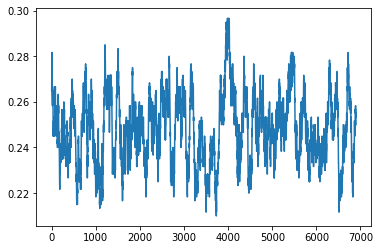

In [4]:
tracc = mov_avg(trsc.mean((1,2)),100)

plt.plot(tracc)

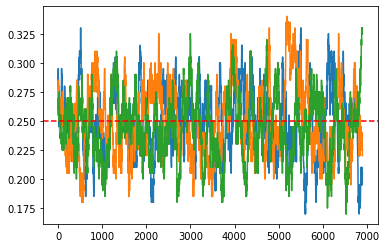

In [5]:
tracc = trsc.mean(-1)

for idx,a in enumerate(tracc.T):
  plt.plot(mov_avg(a,100))
plt.axhline(0.25,c='r',ls='--')

In [6]:
net.debug=True
i,x,y = task.gen_ep_data(4,1)
yh = net(i,x)



st tensor(0.5488)
wm tensor(0.9888)
em tensor(0.)

st tensor(0.7917)
wm tensor(0.0006)
em tensor(0.)

st tensor(0.3595)
wm tensor(0.0427)
em tensor(0.)

st tensor(0.9786)
wm tensor(0.9995)
em tensor(0.)

qkdist2 [0.15  0.035 0.113 0.081]

st tensor(0.5488)
wm tensor(0.9435)
em tensor(0.0006)

st tensor(0.5488)
wm tensor(0.9983)
em tensor(0.)

st tensor(0.3595)
wm tensor(0.0227)
em tensor(0.)

st tensor(0.9786)
wm tensor(0.0012)
em tensor(0.)

st tensor(0.2646)
wm tensor(0.9997)
em tensor(0.)

qkdist2 [0.162 0.038 0.122 0.082 0.118 0.124 0.034 0.087]

st tensor(0.9786)
wm tensor(0.9422)
em tensor(0.0012)

st tensor(0.2646)
wm tensor(0.0016)
em tensor(0.)

st tensor(0.5488)
wm tensor(0.0395)
em tensor(0.)

st tensor(0.9786)
wm tensor(0.9997)
em tensor(0.)

st tensor(0.3595)
wm tensor(0.9973)
em tensor(0.)

qkdist2 [0.151 0.034 0.113 0.08  0.108 0.114 0.033 0.081 0.033 0.099 0.08  0.105]

st tensor(0.5488)
wm tensor(0.9292)
em tensor(0.0012)

st tensor(0.7917)
wm tensor(0.9998)
em tensor

0.0 0.75
0.2 0.7333333333333333
0.4 0.7666666666666667
0.6 0.7333333333333333
0.8 0.7333333333333333
0.0 0.8
0.2 0.7333333333333333
0.4 0.8
0.6 0.7333333333333333
0.8 0.8166666666666667


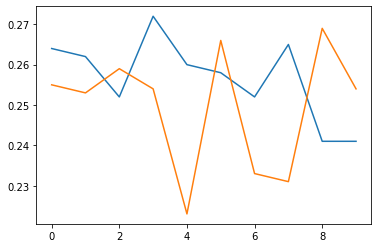

In [7]:
net.debug=False
for em in [1,0]:
  net.EMsetting=em
  evsc = run_net(net,task,500,10,2,training=False)
  evacc = evsc[:,:,nmaps:]
  plt.plot(evacc.mean((0,2)))